In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from citipy import citipy
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | izumo
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | touros
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | lorengau
Processing Record 13 of Set 1 | dondo
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | pervomayskoye
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 19 of Set 1 | bad salzungen
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | bellefontaine
Processing

Processing Record 38 of Set 4 | saint-augustin
Processing Record 39 of Set 4 | dawei
Processing Record 40 of Set 4 | fergus falls
Processing Record 41 of Set 4 | kumluca
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | aguia branca
Processing Record 44 of Set 4 | jalu
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | kigoma
Processing Record 47 of Set 4 | san ignacio
Processing Record 48 of Set 4 | morehead
Processing Record 49 of Set 4 | tautira
Processing Record 50 of Set 4 | provideniya
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | llanes
Processing Record 3 of Set 5 | sola
Processing Record 4 of Set 5 | karamay
City not found. Skipping...
Processing Record 5 of Set 5 | biak
Processing Record 6 of Set 5 | birjand
Processing Record 7 of Set 5 | aripuana
Processing Record 8 of Set 5 | glasgow
Processing Record 9 of Set 5 | anchorage
Processing Record 10 of Set 5 | sistranda
Processing Re

Processing Record 31 of Set 8 | ivdel
Processing Record 32 of Set 8 | the valley
Processing Record 33 of Set 8 | uthal
Processing Record 34 of Set 8 | dunda
Processing Record 35 of Set 8 | dicabisagan
Processing Record 36 of Set 8 | miri
Processing Record 37 of Set 8 | leh
Processing Record 38 of Set 8 | galgani
City not found. Skipping...
Processing Record 39 of Set 8 | coruripe
Processing Record 40 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 8 | changping
Processing Record 42 of Set 8 | port hope
Processing Record 43 of Set 8 | constitucion
Processing Record 44 of Set 8 | yanliang
Processing Record 45 of Set 8 | aksarka
Processing Record 46 of Set 8 | saint-jean-de-maurienne
Processing Record 47 of Set 8 | lakes entrance
Processing Record 48 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 49 of Set 8 | baruun-urt
Processing Record 50 of Set 8 | half moon bay
Processing Record 1 of Set 9 | tommot
Processing Record 2 of Set 9 | 

Processing Record 15 of Set 12 | kyzyl-suu
Processing Record 16 of Set 12 | tsiroanomandidy
Processing Record 17 of Set 12 | almaznyy
Processing Record 18 of Set 12 | arman
Processing Record 19 of Set 12 | puerto colombia
Processing Record 20 of Set 12 | ardistan
City not found. Skipping...
Processing Record 21 of Set 12 | beaverlodge
Processing Record 22 of Set 12 | coahuayana
Processing Record 23 of Set 12 | orichi
Processing Record 24 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 25 of Set 12 | dunedin
Processing Record 26 of Set 12 | naklo nad notecia
Processing Record 27 of Set 12 | san andres
Processing Record 28 of Set 12 | ormara
Processing Record 29 of Set 12 | goba
Processing Record 30 of Set 12 | batouri
Processing Record 31 of Set 12 | camalu
Processing Record 32 of Set 12 | cabatuan
Processing Record 33 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 34 of Set 12 | duz
City not found. Skipping...
Processing Record 35 of 

In [11]:
len(city_data)

535

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Izumo,35.3667,132.7667,87.75,48,20,10.36,JP,2021-09-21 03:45:16
1,Atuona,-9.8000,-139.0333,77.81,72,2,19.98,PF,2021-09-21 03:43:09
2,Kapaa,22.0752,-159.3190,84.18,69,75,14.97,US,2021-09-21 03:45:16
3,Hermanus,-34.4187,19.2345,50.85,69,80,9.51,ZA,2021-09-21 03:45:17
4,Tasiilaq,65.6145,-37.6368,37.56,80,98,7.20,GL,2021-09-21 03:44:33
5,Tuktoyaktuk,69.4541,-133.0374,37.40,81,90,14.97,CA,2021-09-21 03:43:22
6,Pisco,-13.7000,-76.2167,62.65,77,0,4.61,PE,2021-09-21 03:44:51
7,Touros,-5.1989,-35.4608,72.50,77,82,13.85,BR,2021-09-21 03:44:07
8,Albany,42.6001,-73.9662,60.67,90,99,6.11,US,2021-09-21 03:43:18
9,Bethel,41.3712,-73.4140,66.56,88,1,0.00,US,2021-09-21 03:45:18


In [16]:
# Reorder columns in DataFrame
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Izumo,JP,2021-09-21 03:45:16,35.3667,132.7667,87.75,48,20,10.36
1,Atuona,PF,2021-09-21 03:43:09,-9.8000,-139.0333,77.81,72,2,19.98
2,Kapaa,US,2021-09-21 03:45:16,22.0752,-159.3190,84.18,69,75,14.97
3,Hermanus,ZA,2021-09-21 03:45:17,-34.4187,19.2345,50.85,69,80,9.51
4,Tasiilaq,GL,2021-09-21 03:44:33,65.6145,-37.6368,37.56,80,98,7.20
5,Tuktoyaktuk,CA,2021-09-21 03:43:22,69.4541,-133.0374,37.40,81,90,14.97
6,Pisco,PE,2021-09-21 03:44:51,-13.7000,-76.2167,62.65,77,0,4.61
7,Touros,BR,2021-09-21 03:44:07,-5.1989,-35.4608,72.50,77,82,13.85
8,Albany,US,2021-09-21 03:43:18,42.6001,-73.9662,60.67,90,99,6.11
9,Bethel,US,2021-09-21 03:45:18,41.3712,-73.4140,66.56,88,1,0.00


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

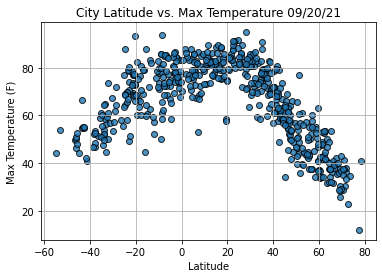

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

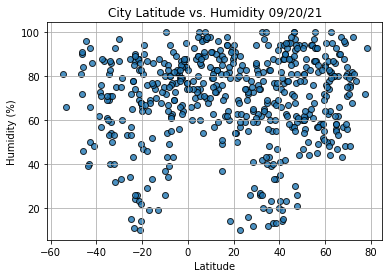

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

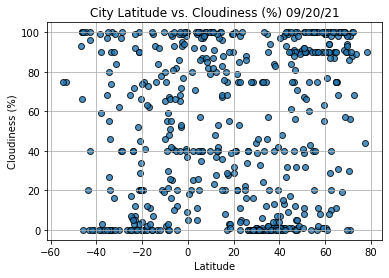

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

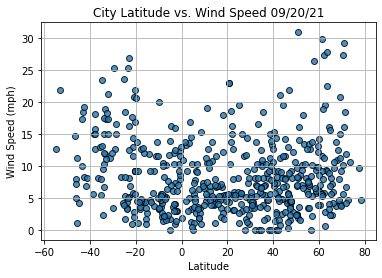

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [40]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    # print r-value
    print(f"r-value: {r_value:.3f}")

In [41]:
index13 = city_data_df.loc[13]
index13

City                Pervomayskoye
Country                        RU
Date          2021-09-21 03:45:19
Lat                        43.919
Lng                       46.7102
Max Temp                     66.9
Humidity                       67
Cloudiness                      9
Wind Speed                   2.48
Name: 13, dtype: object

In [42]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
530     True
531     True
532     True
533     True
534    False
Name: Lat, Length: 535, dtype: bool

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Izumo,JP,2021-09-21 03:45:16,35.3667,132.7667,87.75,48,20,10.36
2,Kapaa,US,2021-09-21 03:45:16,22.0752,-159.3190,84.18,69,75,14.97
4,Tasiilaq,GL,2021-09-21 03:44:33,65.6145,-37.6368,37.56,80,98,7.20
5,Tuktoyaktuk,CA,2021-09-21 03:43:22,69.4541,-133.0374,37.40,81,90,14.97
8,Albany,US,2021-09-21 03:43:18,42.6001,-73.9662,60.67,90,99,6.11


In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

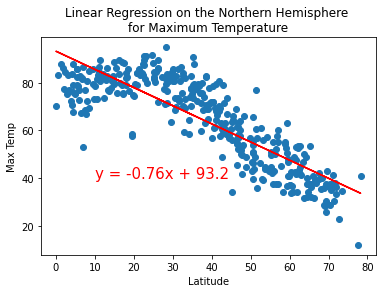

r-value: -0.849


In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(10,40))



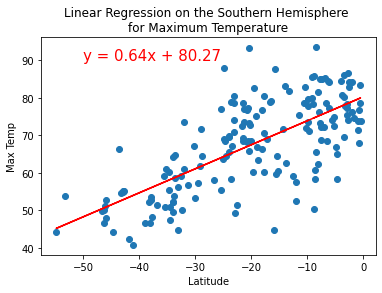

r-value: 0.708


In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(-50,90))

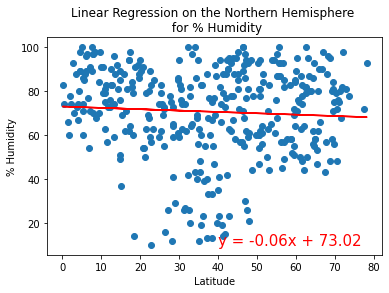

r-value: -0.061


In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',(40,10))

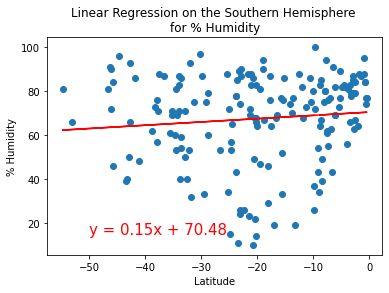

r-value: 0.098


In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity',
                       '% Humidity',(-50,15))

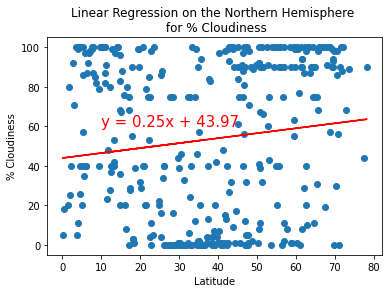

r-value: 0.127


In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(10,60))

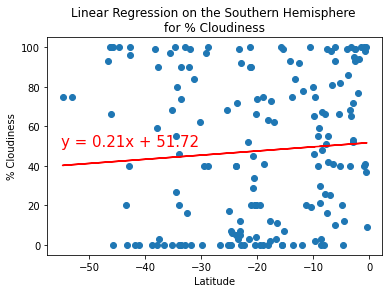

r-value: 0.075


In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness',(-55,50))

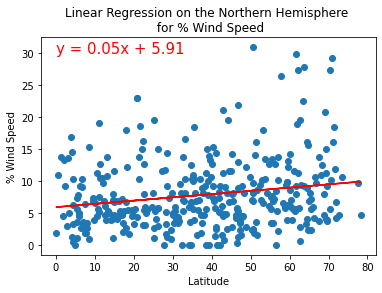

r-value: 0.186


In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Wind Speed',
                       '% Wind Speed',(0,30))

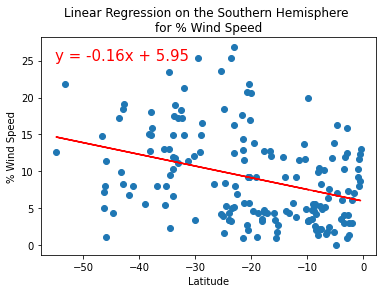

r-value: -0.353


In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Wind Speed',
                       '% Wind Speed',(-55,25))